## Alzheimer Disease

### Import libs

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline



In [138]:
alzheimer_df = pd.read_csv("alzheimers_disease_data.csv")
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [139]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Categorical and Numerical features selection (manually)

In [140]:
# 18 categorical features
categorical_features = ['Gender',
                     'Ethnicity',
                     'EducationLevel',
                     'Smoking',
                     'FamilyHistoryAlzheimers',
                     'CardiovascularDisease',
                     'Diabetes',
                     'Depression',
                     'HeadInjury',
                     'Hypertension',
                     'MemoryComplaints',
                     'BehavioralProblems',
                     'Confusion',
                     'Disorientation',
                     'PersonalityChanges',
                     'DifficultyCompletingTasks',
                     'Forgetfulness',
                     'Diagnosis']

# 15 numerical features
numerical_features = ['Age',     
                      'BMI',
                      'AlcoholConsumption',
                      'PhysicalActivity',
                      'DietQuality',
                      'SleepQuality',
                      'SystolicBP',
                      'DiastolicBP',
                      'CholesterolTotal',
                      'CholesterolLDL',
                      'CholesterolHDL',
                      'CholesterolTriglycerides',
                      'MMSE',
                      'FunctionalAssessment',
                      'ADL']


alzheimer_df[numerical_features] = alzheimer_df[numerical_features].astype('float')
alzheimer_df[categorical_features] = alzheimer_df[categorical_features].astype('int')

### Remove irrelevant features

In [141]:
# Drop PatientID and DoctorInCharge
alzheimer_df.drop(inplace=True, columns={'DoctorInCharge', 'PatientID'})

alzheimer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   float64
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

### Missing Value & Duplicate

<Axes: >

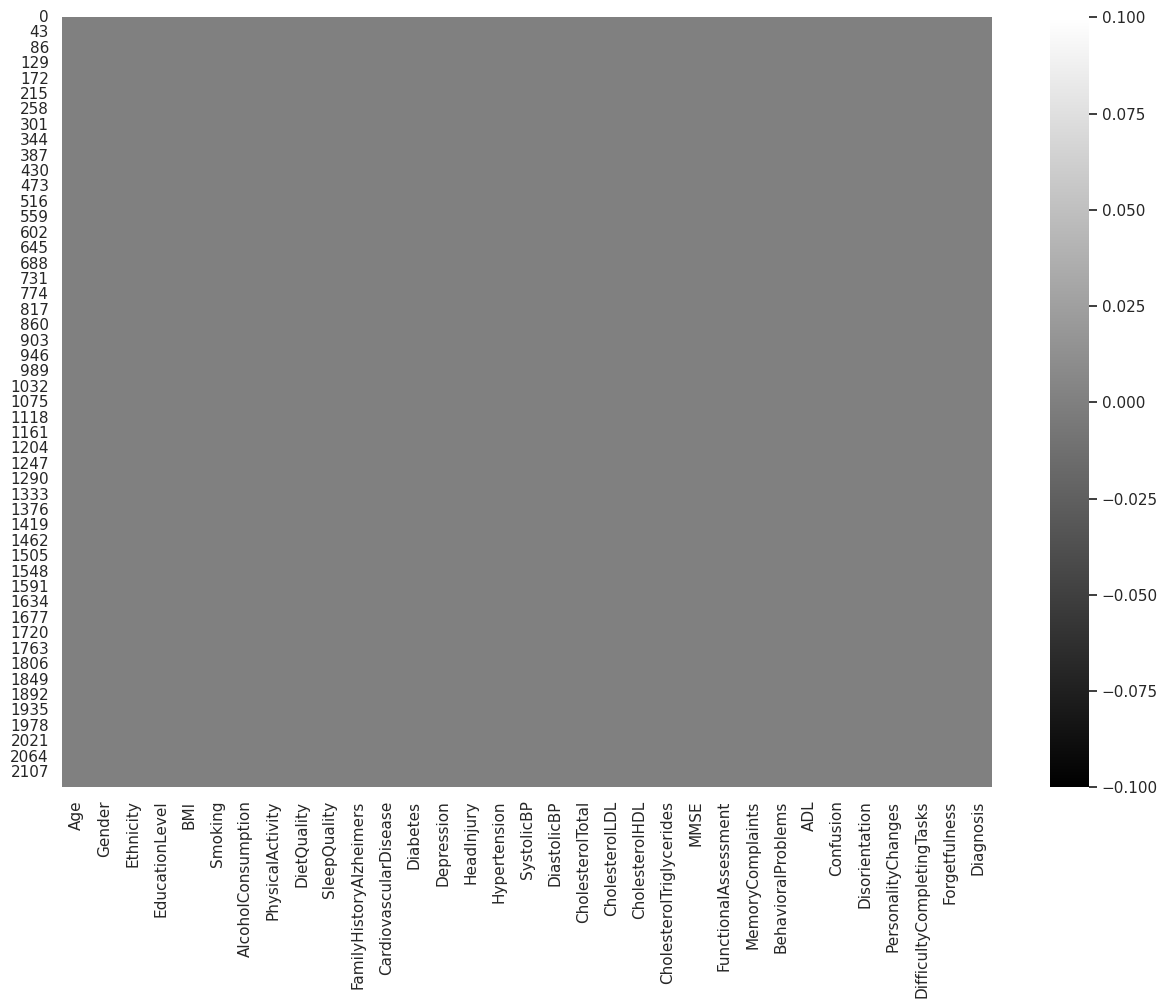

In [142]:
plt.subplots(figsize=(15, 10))
sns.heatmap(alzheimer_df.isnull(), cmap='gray')

*No missing values found*

### Numerical Features Exploration

In [143]:
alzheimer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


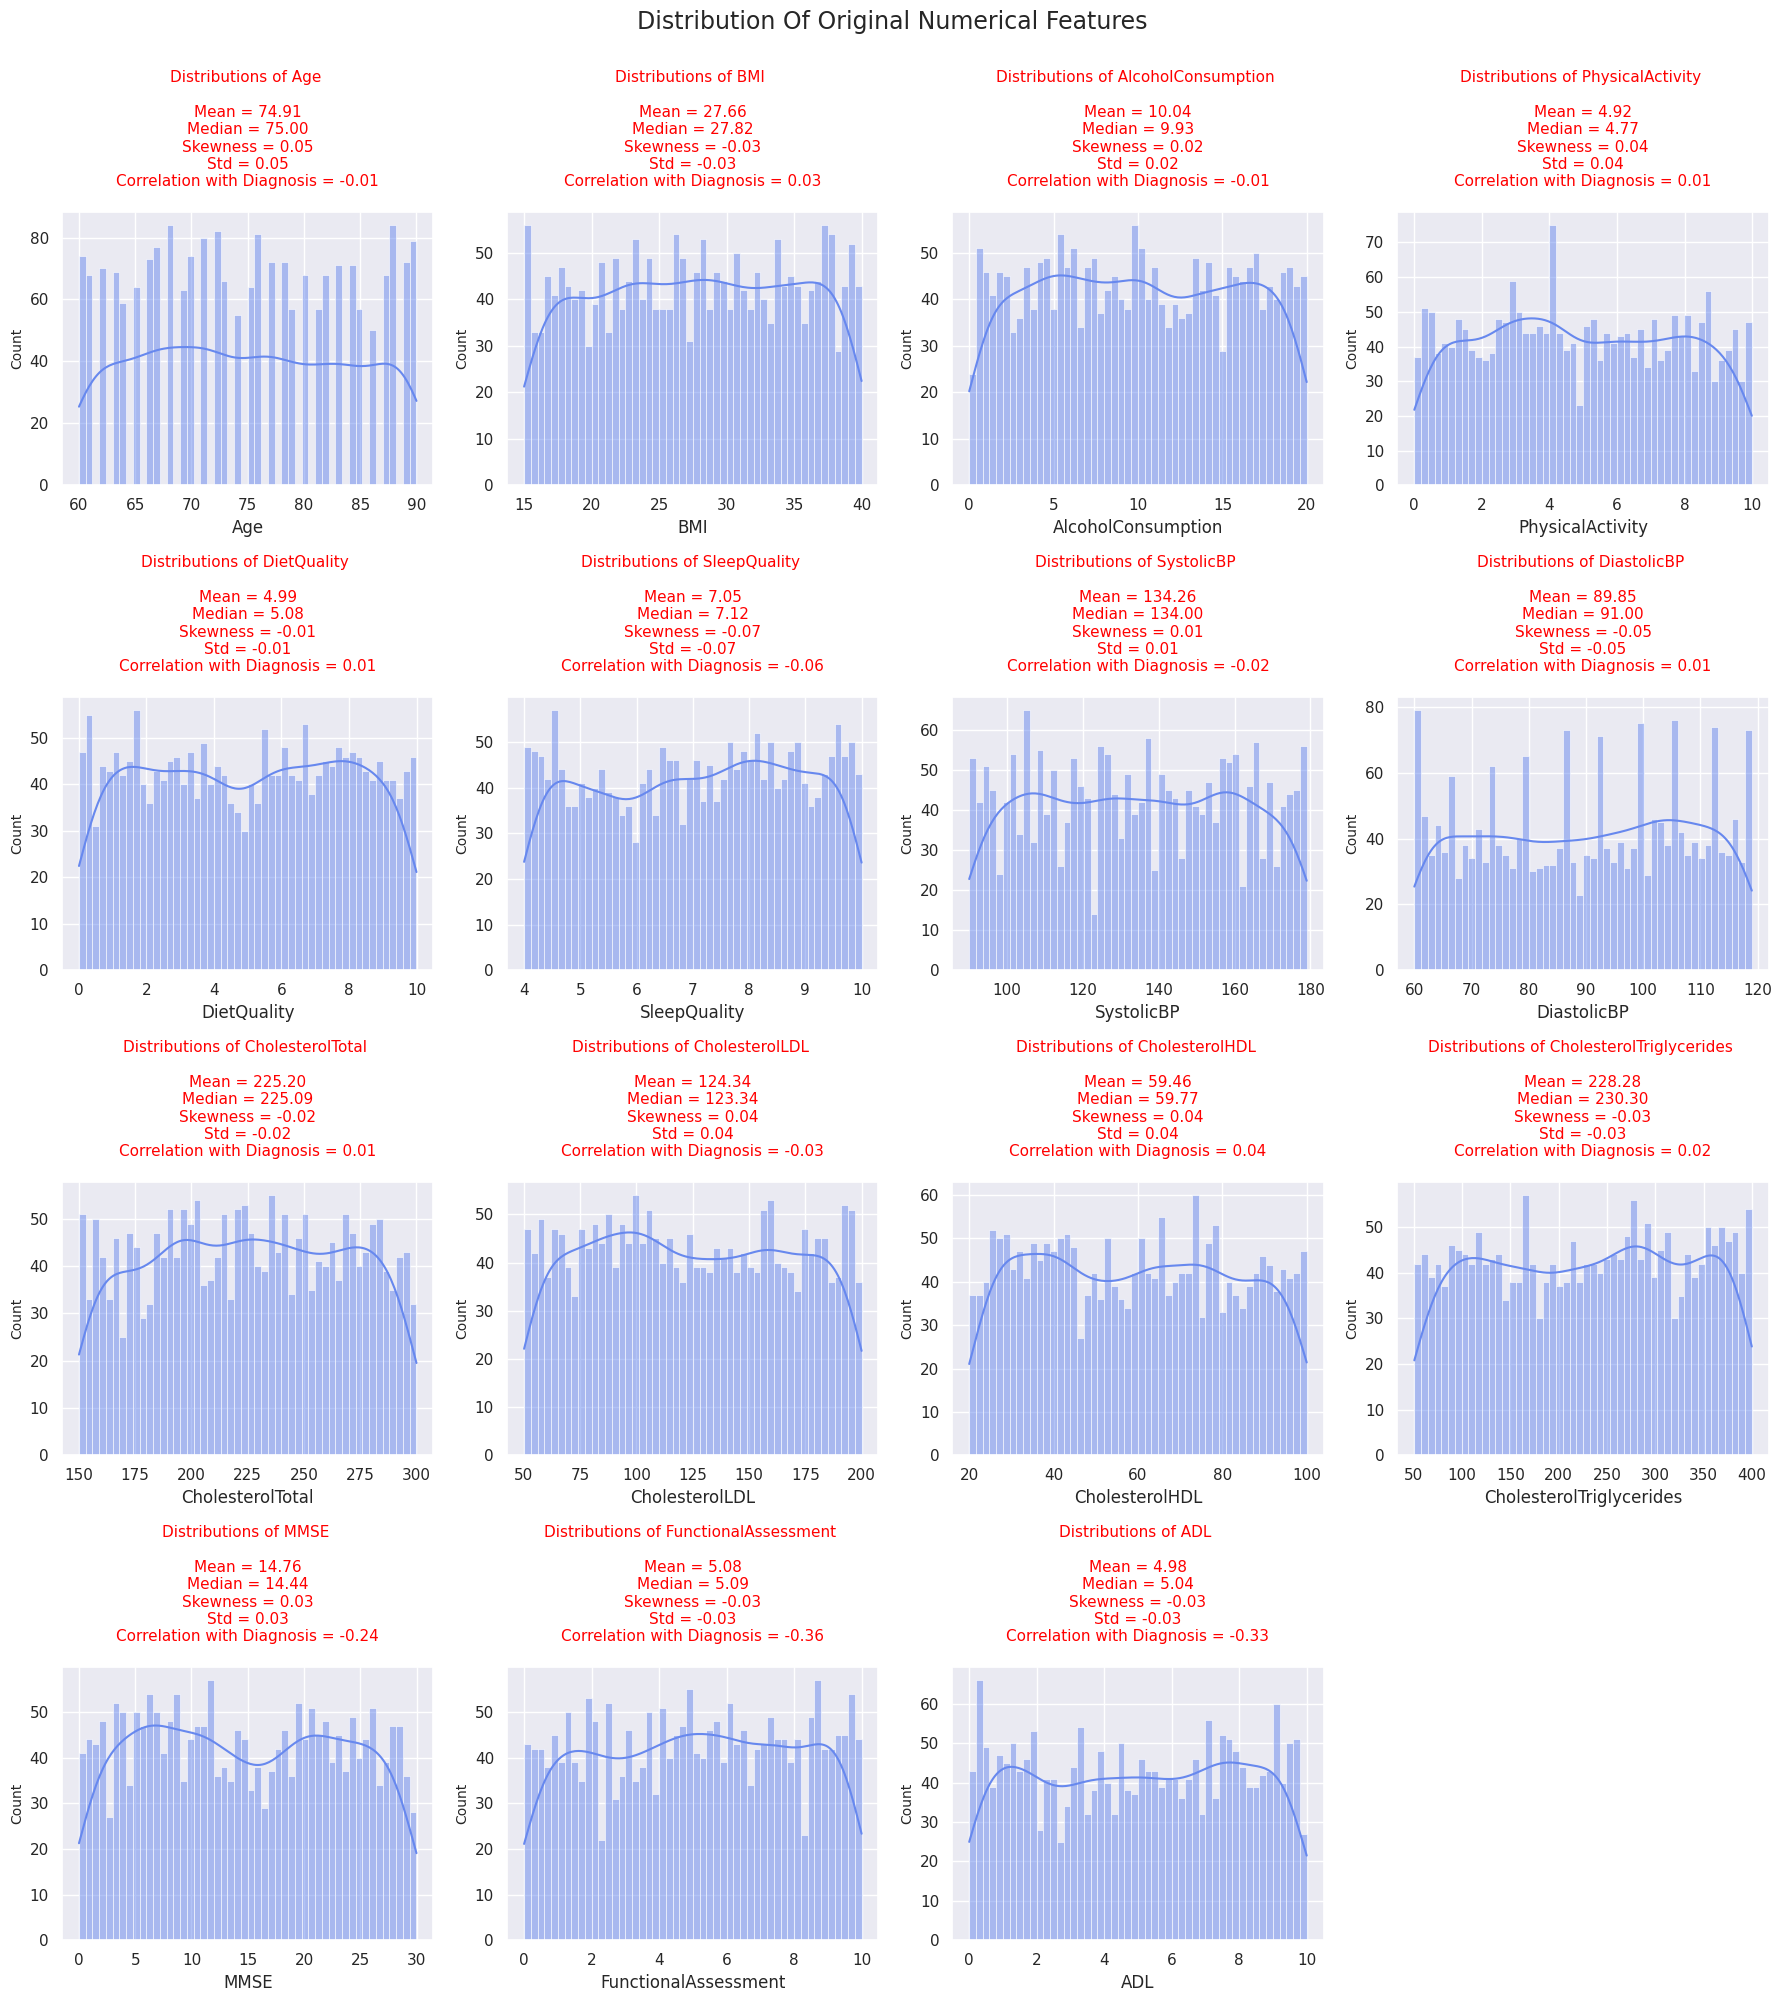

In [144]:

skewness = alzheimer_df[numerical_features].skew()
mean = alzheimer_df[numerical_features].mean()
median =alzheimer_df[numerical_features].median()
std = alzheimer_df[numerical_features].std()


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    corr_with_diagnosis = alzheimer_df[["Diagnosis", column]].corr()

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_title(f'Distributions of {column} \n\n'
                 f'Mean = {mean[i]:,.2f}\n'
                 f'Median = {median[i]:,.2f}\n'
                 f'Skewness = {skewness[i]:,.2f}\n'
                 f'Std = {skewness[i]:,.2f}\n'
                 f'Correlation with Diagnosis = {corr_with_diagnosis.values[0][1]:,.2f}\n',
                 fontsize=11, 
                 color='red')
    
    sns.histplot(alzheimer_df[column], ax=ax, kde=True, bins=50)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Correlation of all numerical features with Diagnosis

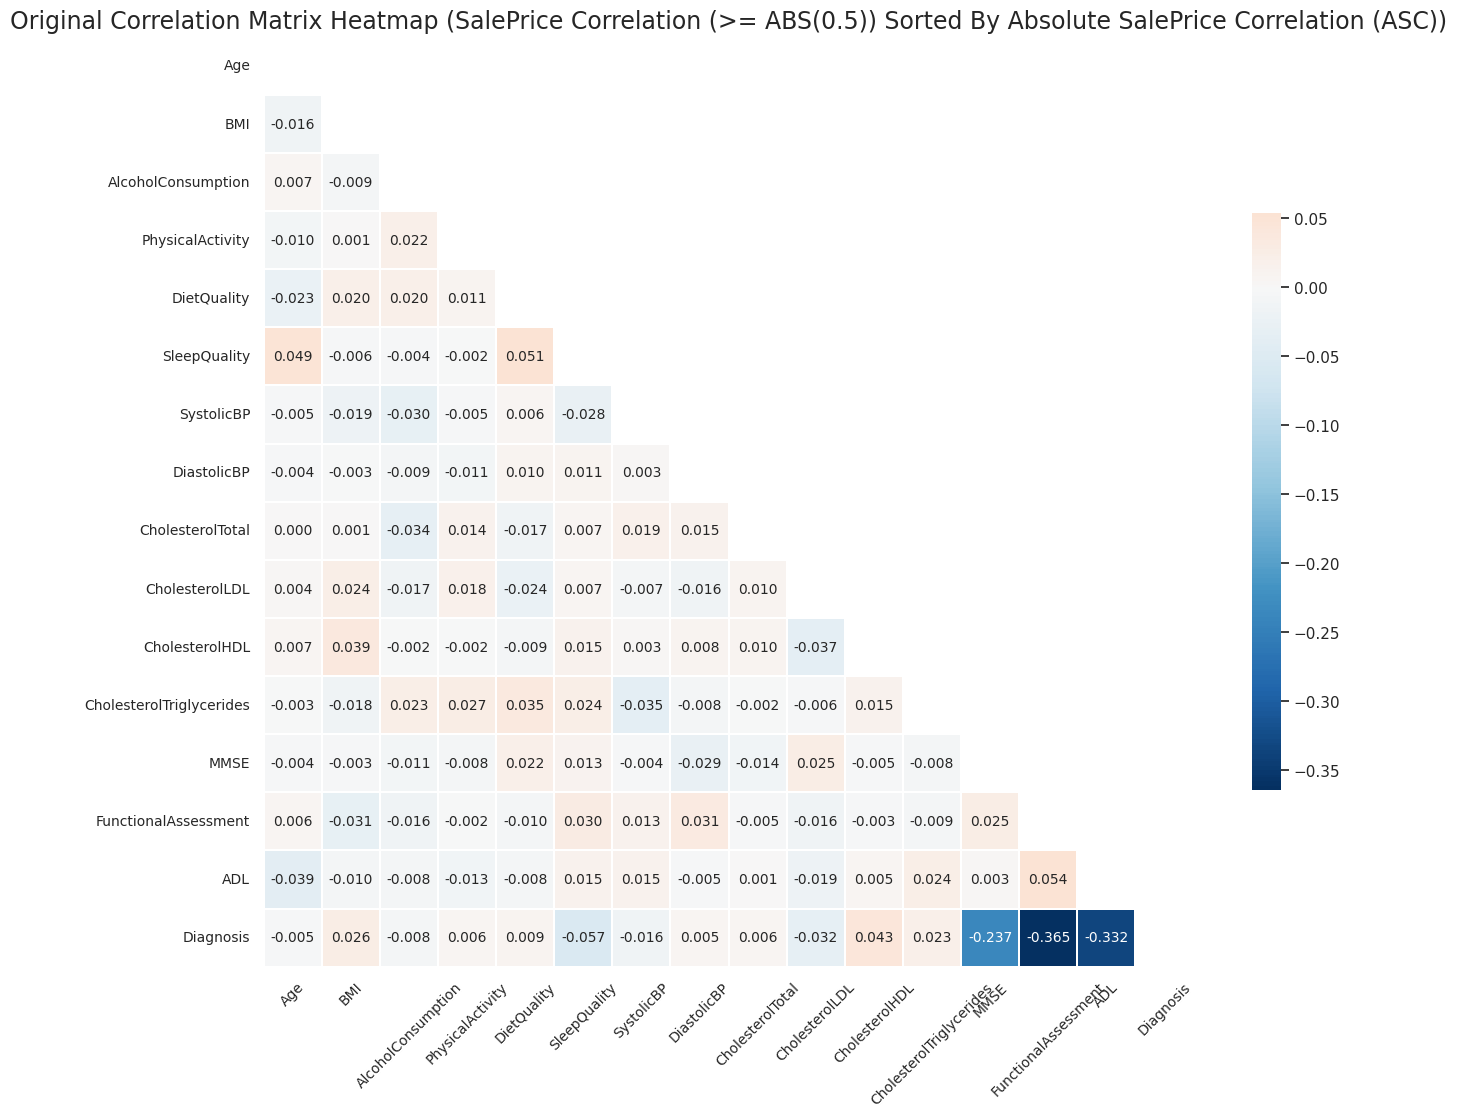

In [145]:
corr = alzheimer_df[numerical_features + ['Diagnosis']].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (SalePrice Correlation (>= ABS(0.5)) Sorted By Absolute SalePrice Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

*Not too much feature with the high correlation*

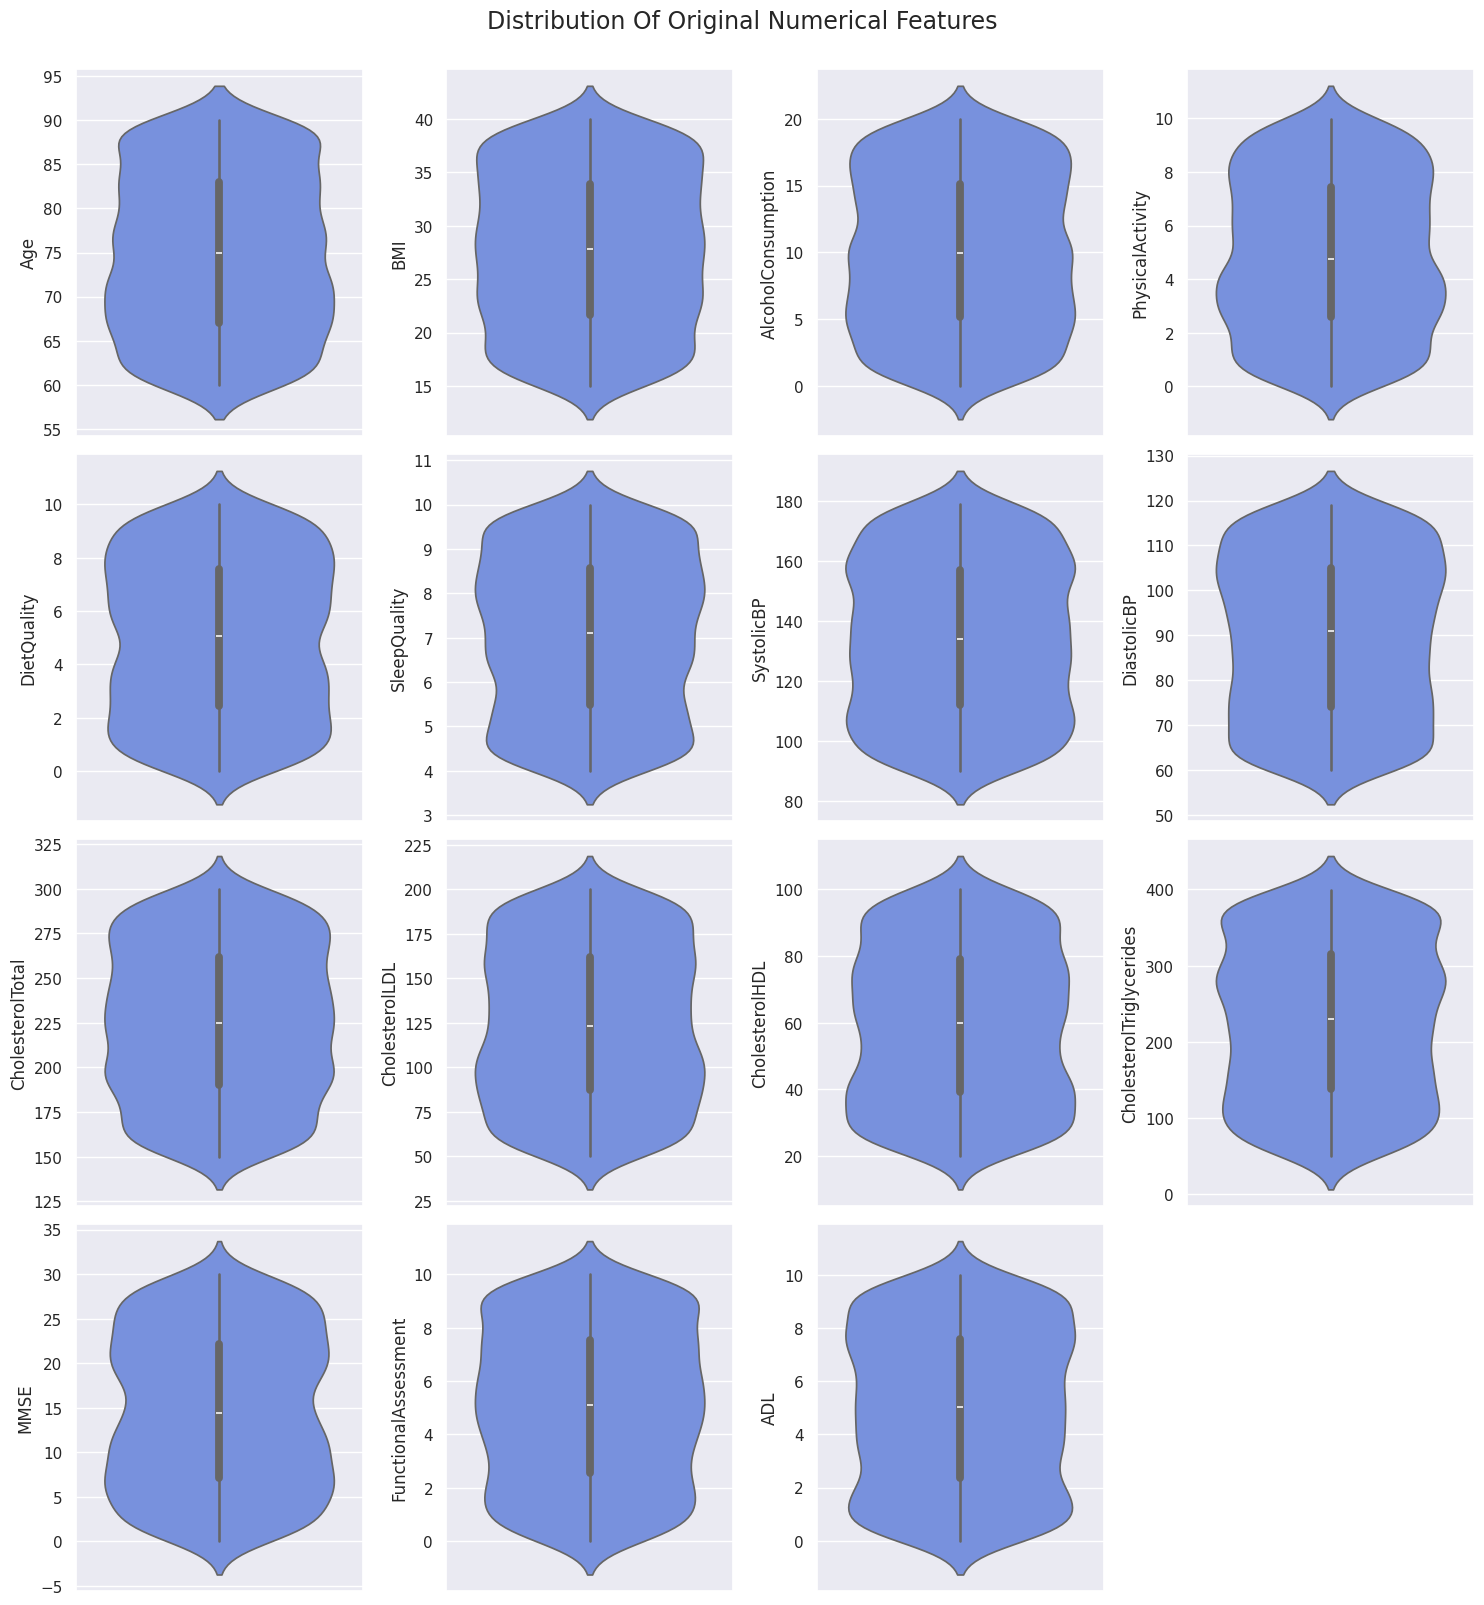

In [146]:

# skewness = alzheimer_df[numerical_features].skew()
# mean = alzheimer_df[numerical_features].mean()
# median =alzheimer_df[numerical_features].median()
# std = alzheimer_df[numerical_features].std()


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution Of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    corr_with_diagnosis = alzheimer_df[["Diagnosis", column]].corr()

    ax = axes[i]    
    sns.violinplot(alzheimer_df[column], ax=ax)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Categorical features Exploration

In [148]:
alzheimer_df.describe(include='int64').transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2149.0,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
Smoking,2149.0,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
FamilyHistoryAlzheimers,2149.0,0.252210,0.434382,0.0,0.0,0.0,1.0,1.0
CardiovascularDisease,2149.0,0.144253,0.351428,0.0,0.0,0.0,0.0,1.0
Diabetes,2149.0,0.150768,0.357906,0.0,0.0,0.0,0.0,1.0
Depression,2149.0,0.200558,0.400511,0.0,0.0,0.0,0.0,1.0
HeadInjury,2149.0,0.092601,0.289940,0.0,0.0,0.0,0.0,1.0
Hypertension,2149.0,0.148906,0.356079,0.0,0.0,0.0,0.0,1.0


### Label for categorical features

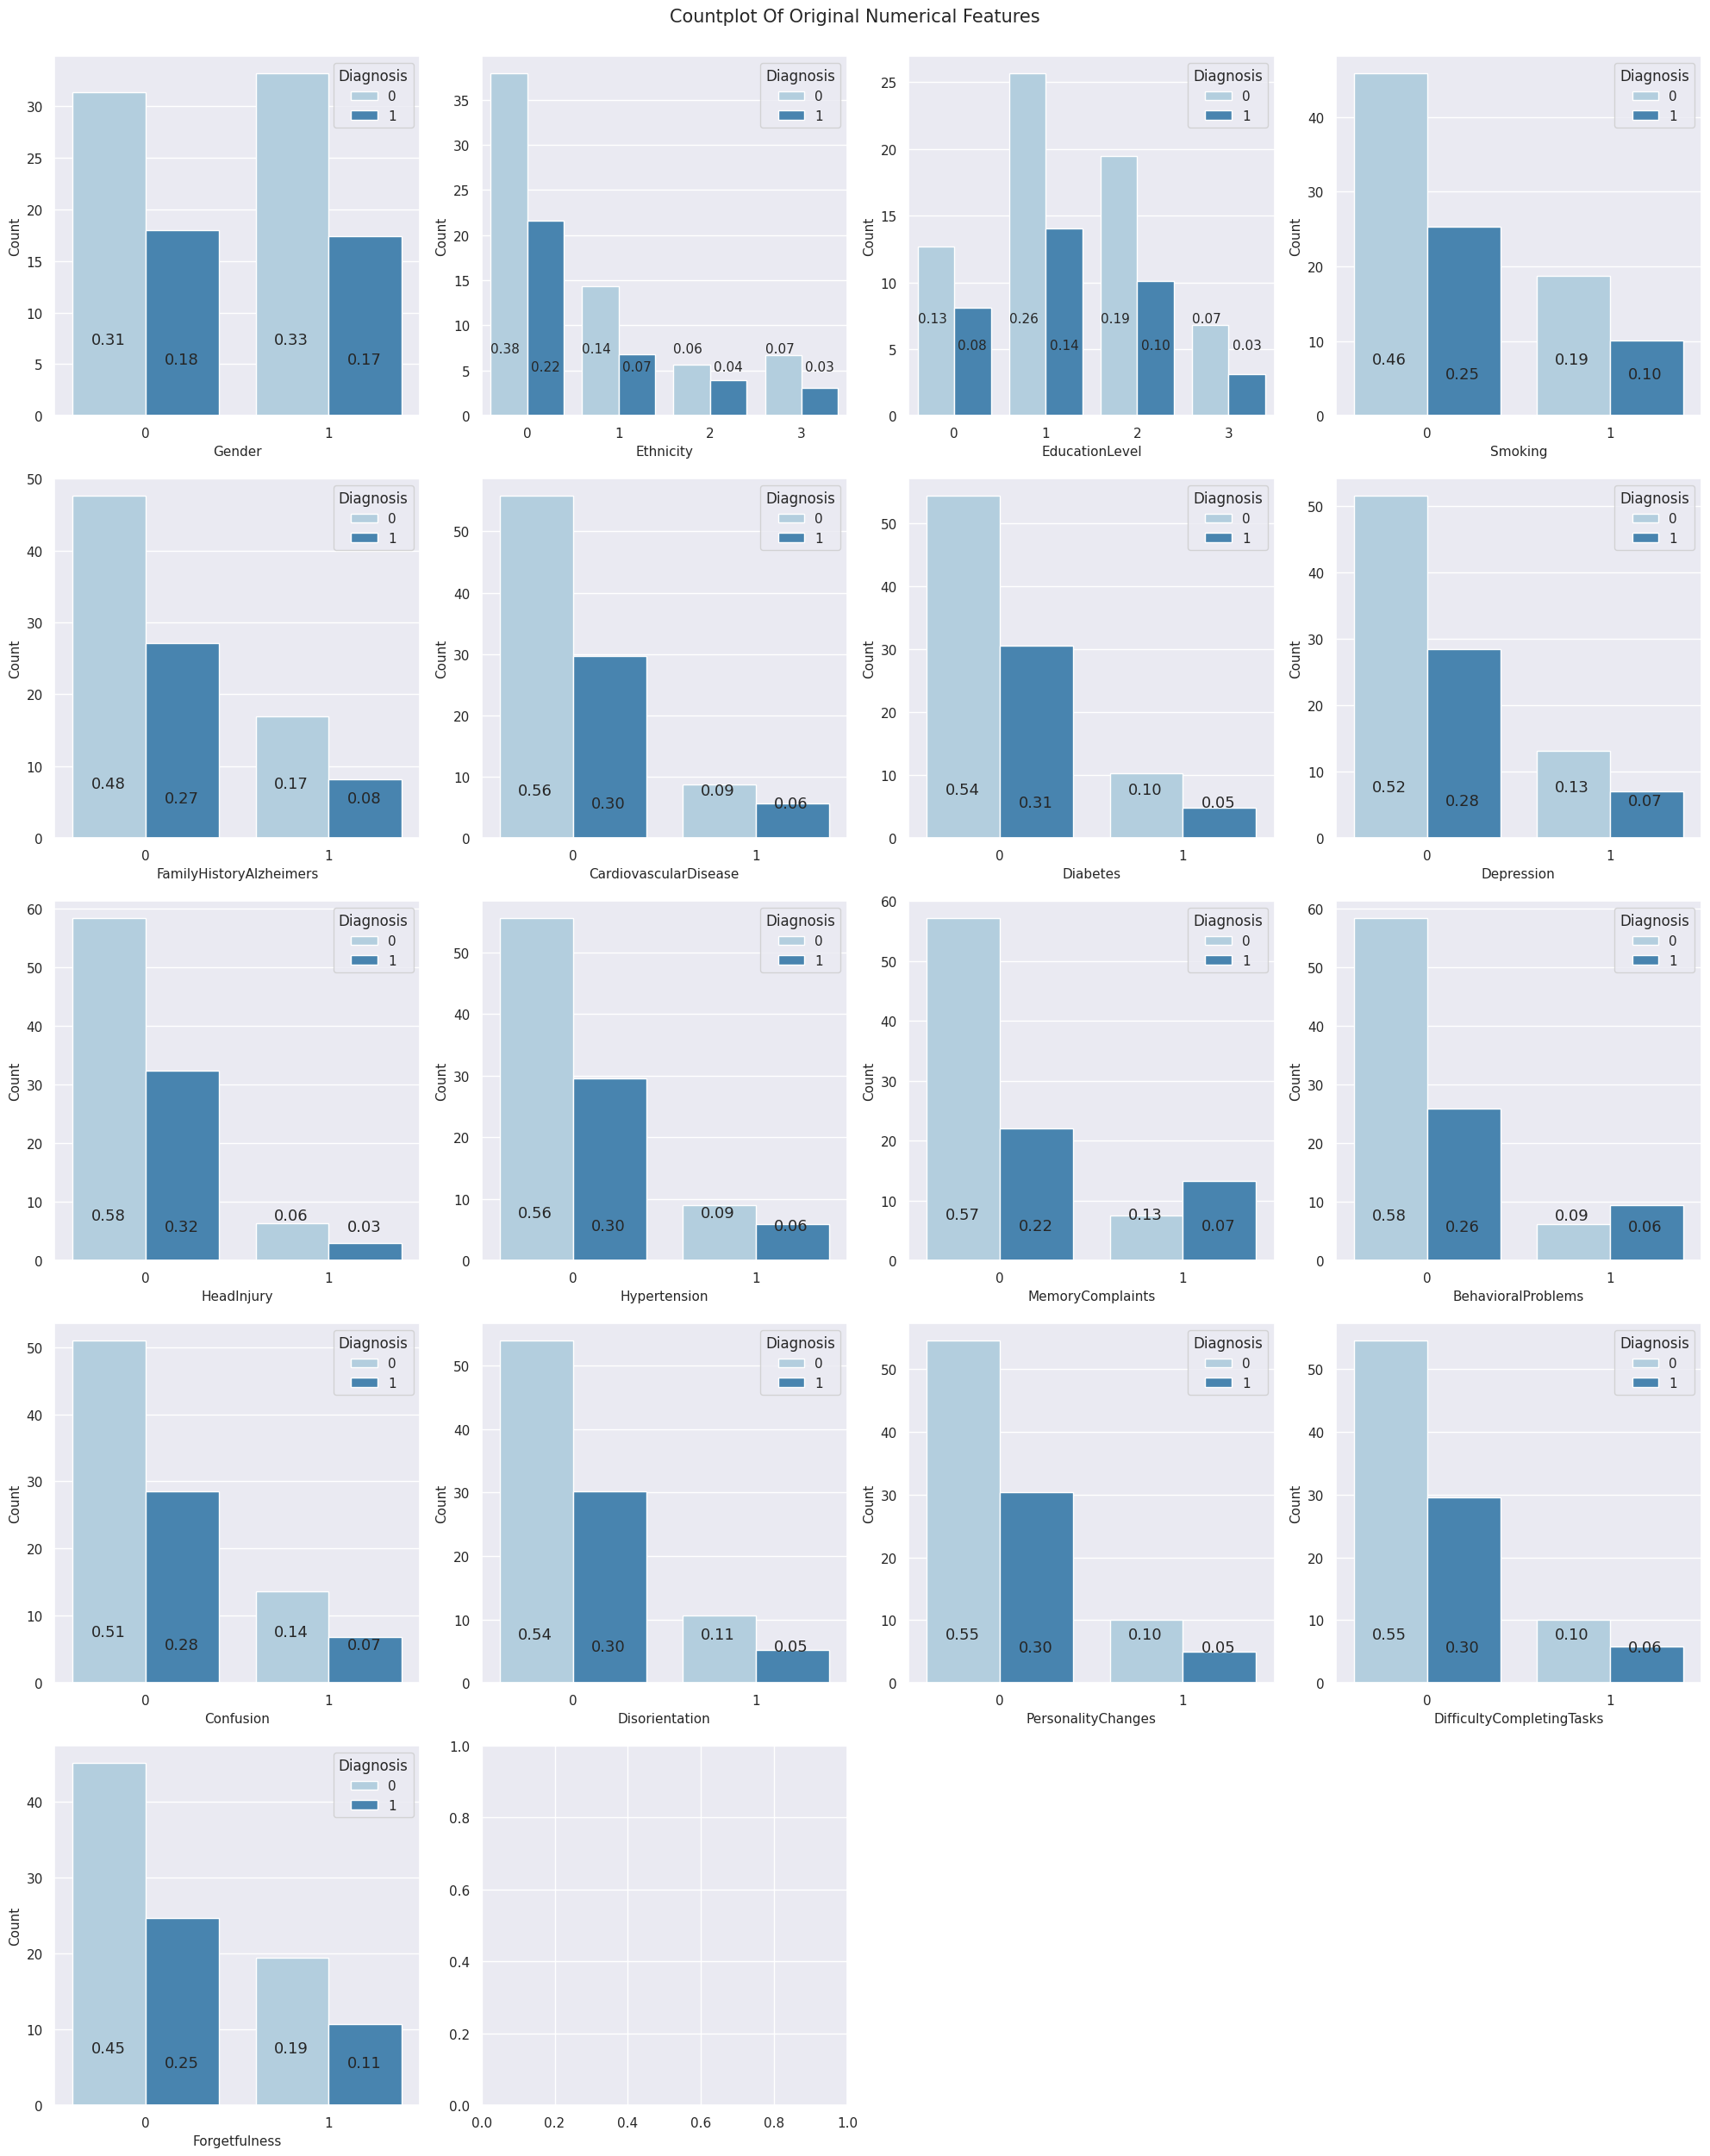

In [149]:
num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Numerical Features", y=1, fontsize=15)


for i, column in enumerate(categorical_features):

    if column == "Diagnosis":
        continue

    ax = axes[i]
    sns.countplot(data=alzheimer_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'],    
                  stat='percent')
    
    discrete_values = alzheimer_df[[column,'Diagnosis']].value_counts(normalize=True)
    discrete_values = discrete_values.reset_index()
    discrete_values = discrete_values.set_index(column)


    range_of = discrete_values.shape[0] // 2

    if range_of == 2:
        for i in range(range_of):
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.15 * range_of ,7), fontsize=13, )
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.05 * range_of, 5), fontsize=13,)

    if range_of == 3:
        for i in range(range_of):
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.1 * range_of ,7), fontsize=12)
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.02 * range_of, 5), fontsize=12)

    if range_of == 4:
        for i in range(range_of):
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.1 * range_of ,7), fontsize=11)
            ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.01 * range_of, 5), fontsize=11)
            
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)


    
# Remove empty subplots if necessary
if len(categorical_features) < num_cols * num_rows:
    for i in range(len(categorical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Correlation of all categorical feature with Diagnosis

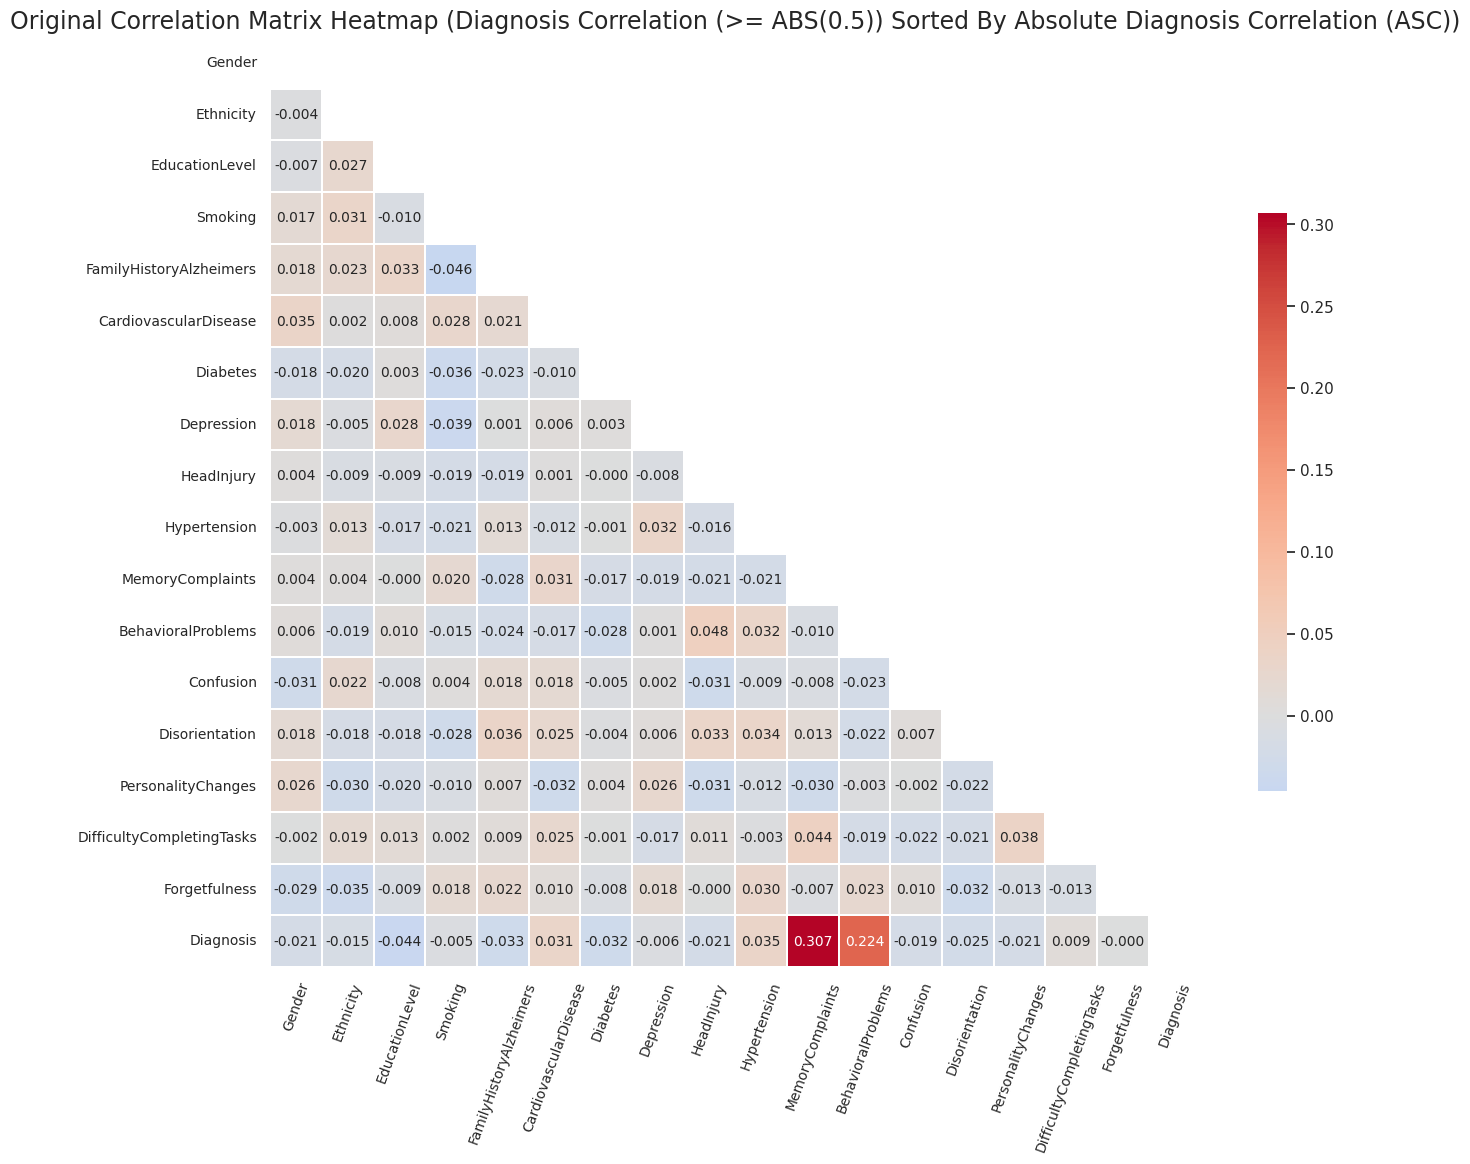

In [150]:
corr = alzheimer_df[categorical_features].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=70)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (Diagnosis Correlation (>= ABS(0.5)) Sorted By Absolute Diagnosis Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

## Diagnosis Feature Exploratory (Target)

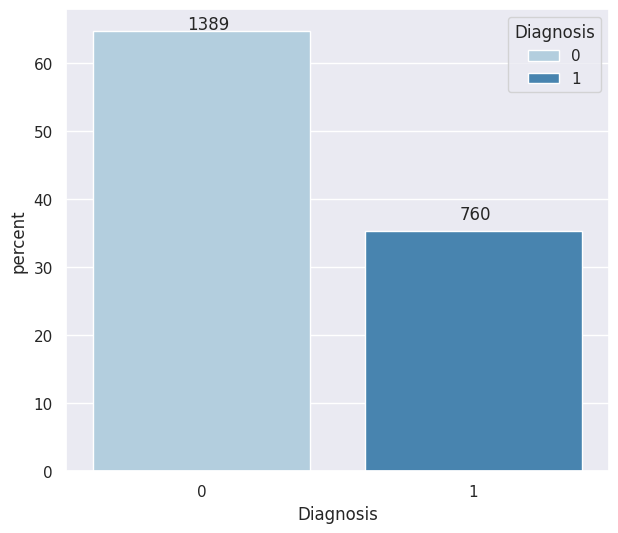

In [206]:
Diagnosis_count = alzheimer_df['Diagnosis'].value_counts()

plt.figure(figsize=(7, 6))

sns.countplot(data=alzheimer_df,
                  x='Diagnosis', 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'],    
                  stat='percent')

plt.text(x=-0.055, y=65, s=Diagnosis_count[0])
plt.text(x=0.95, y=37, s=Diagnosis_count[1])

plt.show()


*Not too much imbalanced class*

## Preprocessing Data

In [152]:
X = alzheimer_df.drop(columns={'Diagnosis'})
y = alzheimer_df[['Diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

### Rescaling Numerical Features

In [153]:

rescaling_pipeline = Pipeline(steps=[
    ('RobustScalar', RobustScaler(with_centering=True, 
                                with_scaling=True, 
                                quantile_range=(25.0, 75.0), 
                                copy=True,)),

    ('MinMaxScalar', MinMaxScaler(feature_range=(0,1))),
])


X_train[numerical_features] = rescaling_pipeline.fit_transform(X_train[numerical_features])
X_test[numerical_features] = rescaling_pipeline.transform(X_test[numerical_features])


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1504.0,0.496809,0.300051,0.0,0.233333,0.500000,0.766667,1.0
BMI,1504.0,0.498533,0.290268,0.0,0.249264,0.510421,0.747688,1.0
AlcoholConsumption,1504.0,0.501118,0.289151,0.0,0.255995,0.496106,0.757933,1.0
PhysicalActivity,1504.0,0.494911,0.288573,0.0,0.255136,0.478818,0.754574,1.0
DietQuality,1504.0,0.499599,0.295295,0.0,0.236848,0.504856,0.764807,1.0
SleepQuality,1504.0,0.507708,0.295521,0.0,0.246217,0.519244,0.761787,1.0
SystolicBP,1504.0,0.498969,0.293013,0.0,0.235955,0.494382,0.752809,1.0
DiastolicBP,1504.0,0.500282,0.295765,0.0,0.237288,0.508475,0.745763,1.0
CholesterolTotal,1504.0,0.499155,0.283625,0.0,0.267601,0.499516,0.746255,1.0
CholesterolLDL,1504.0,0.501410,0.289052,0.0,0.250002,0.499629,0.753673,1.0


### Feature Engineering 

## Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.cluster import KMeans

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

svc = SVC()
naive = GaussianNB()
logistic = LogisticRegression()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()

light = LGBMClassifier()
cat = CatBoostClassifier()

base_models = [svc, naive, logistic, forest, tree, knn, ada, light]


### Validating base model

In [ ]:
classification_train_reports = {}
classification_test_reports = {}
confusion_matrixes_test_set = {}
confusion_matrixes_train_set = {}

def validate_model(base_models, X_true, y_true):

    confusion_matrixes = {}
    classification_reports = {}

    for model in base_models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_true)

        confusion_matrixes[model.__class__.__name__ ] = (confusion_matrix(y_pred, y_true))
        classification_reports[model.__class__.__name__ ] = classification_report(y_pred, y_true)

    return confusion_matrixes, classification_reports


confusion_matrixes_train_set, classification_train_reports = validate_model(base_models, X_train, y_train)
confusion_matrixes_test_set, classification_test_reports = validate_model(base_models, X_test, y_test)
    

[LightGBM] [Info] Number of positive: 530, number of negative: 974
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352394 -> initscore=-0.608534
[LightGBM] [Info] Start training from score -0.608534
[LightGBM] [Info] Number of positive: 530, number of negative: 974
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352394 -> initscore=-0.608534
[LightGBM] [Info] Start training from score -0.608534


### Confusion matrix for train set

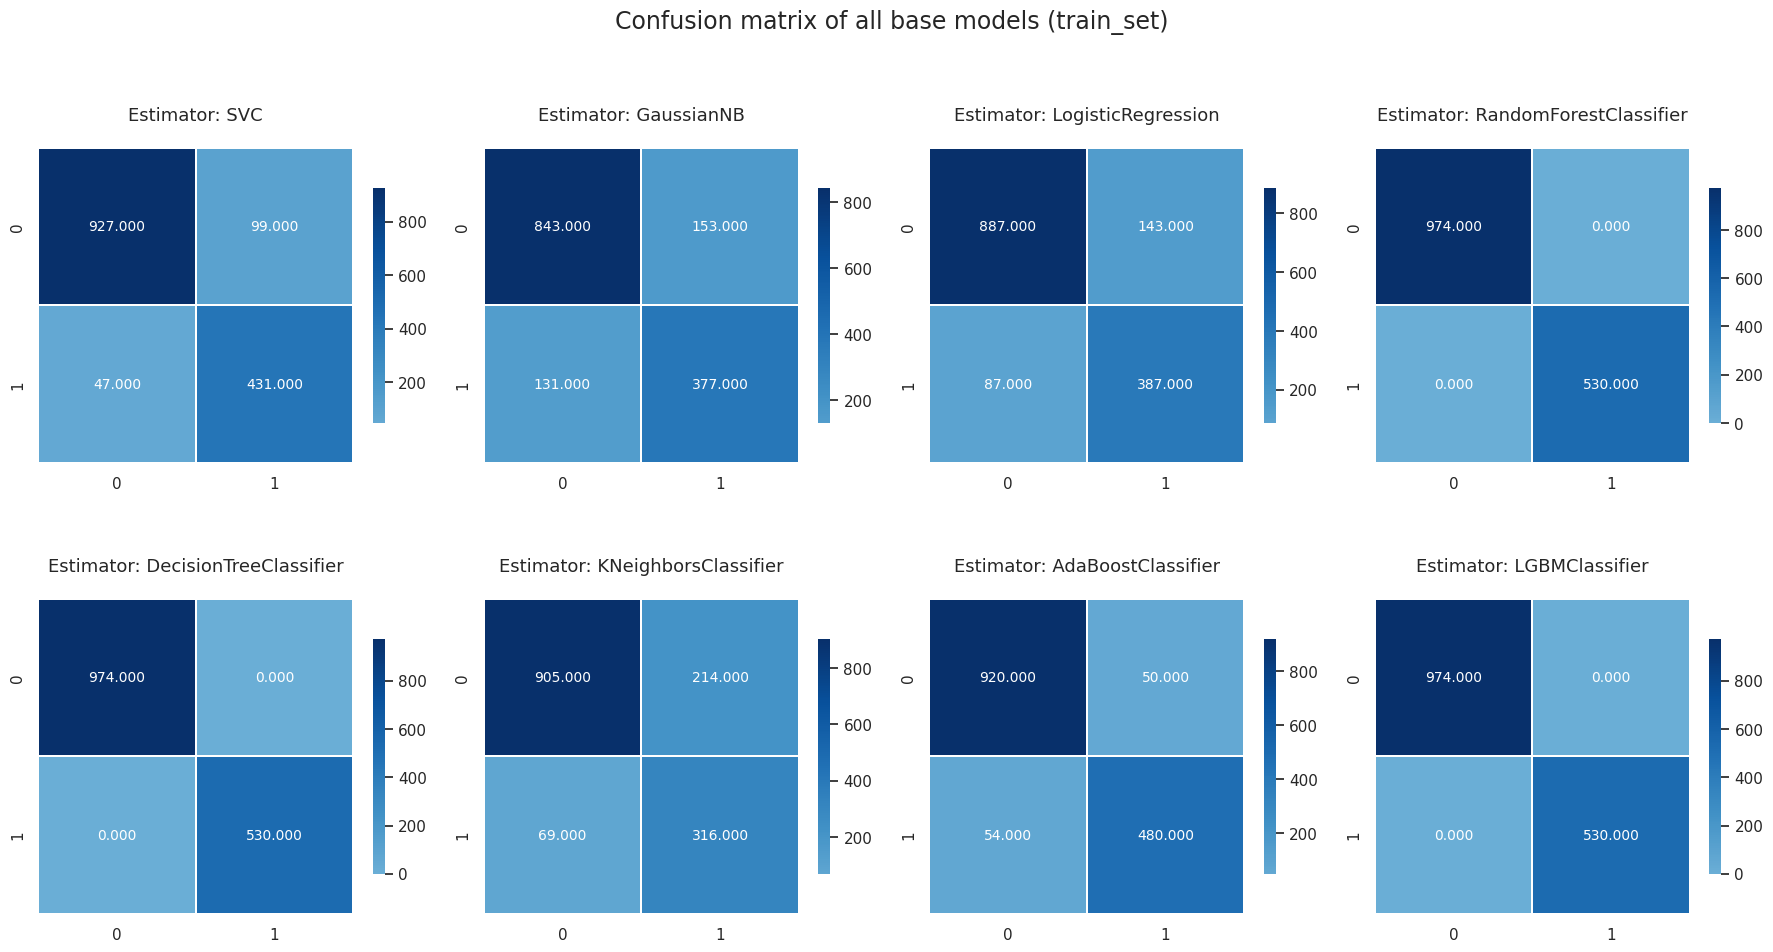

In [ ]:


num_cols = 4
num_rows = (len(confusion_matrixes_train_set) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all base models (train_set)", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes_train_set):

    ax = axes[i]

    sns.heatmap(confusion_matrixes_train_set[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes_train_set) < num_cols * num_rows:
    for i in range(len(confusion_matrixes_train_set), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

#### Top 3 best model

- DecisionTreeClassifier
- LGBMClassifier
- RandomForestClassifier



### Confusion matrix for test set

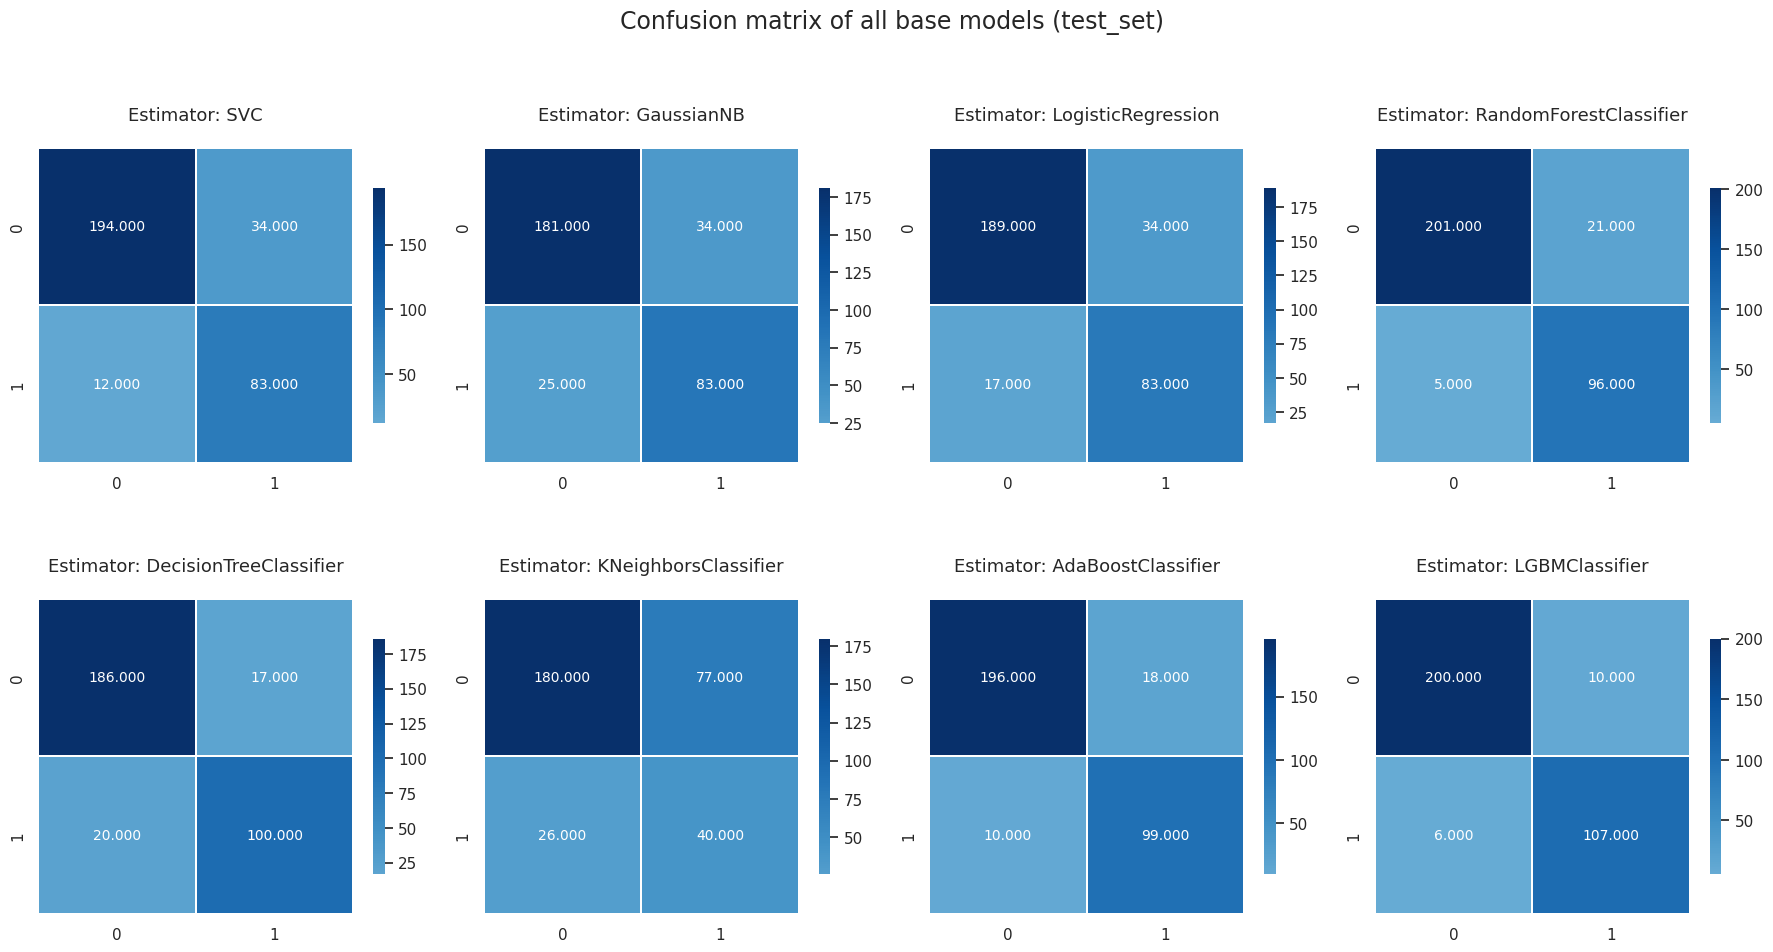

In [ ]:


num_cols = 4
num_rows = (len(confusion_matrixes_test_set) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all base models (test_set)", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes_test_set):

    ax = axes[i]

    sns.heatmap(confusion_matrixes_test_set[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes_test_set) < num_cols * num_rows:
    for i in range(len(confusion_matrixes_test_set), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

#### Top 4 best model

- LGBMClassifier
- RandomForestClassifier
- AdaBoostClassifier
- SVC

### Classification reports

In [ ]:
def make_classification_reports(reports, name_set):

    # initialize DataFrame
    df_reports = pd.DataFrame()
    df_break = pd.DataFrame([0]).transpose()

    for model_name, report in reports.items():

        df_report = pd.DataFrame([line.split(' '*6) for line in report.split('\n')], 
                    columns=['Metric','Class', 'Precision', 'Recall', 'F1score', 'support']).dropna()
        df_report = pd.concat([df_report,df_break])
        df_report['Model_name'] = pd.Series([model_name]*6)
        df_report.set_index(['Model_name', 'Metric'],inplace=True,)
        df_report.fillna(' ', inplace=True)
        df_report.reset_index()

        df_reports = pd.concat([df_reports,df_report])

    # Drop unimportant column
    df_reports.drop(columns={0, 'support'}, inplace=True)

    # creating hierarchical column name
    tups = zip(*[[name_set]*4,df_report.columns])
    df_reports.columns = pd.MultiIndex.from_tuples(tups )

    return  df_reports

# concatenating training and testing reports
df_reports = pd.concat([
    make_classification_reports(classification_train_reports, 'Train_set').assign(I=''),
    make_classification_reports(classification_test_reports, 'Test_set')
], axis=1)
    

df_reports


Train_set                           I Test_set            \
                                      Class   Precision Recall F1score     Class   Precision   
Model_name             Metric                                                                  
SVC                                        0      0.95   0.90      0.93         0      0.94    
                                           1      0.81   0.90      0.86         1      0.71    
                           accuracy                                0.90                        
                       NaN                                                                     
GaussianNB                                 0      0.87   0.85      0.86         0      0.88    
                                           1      0.71   0.74      0.73         1      0.71    
                           accuracy                                0.81                        
                       NaN                                                                     
LogisticRegression                         0      0.91   0.86      0.89         0      0.92    
                                           1      0.73   0.82      0.77         1      0.71    
                           accuracy                                0.85                        
                       NaN                                                                     
RandomForestClassifier                     0      1.00   1.00      1.00         0      0.98    
                                           1      1.00   1.00      1.00         1      0.82    
                           accuracy                                1.00                        
                       NaN                                                                     
DecisionTreeClassifier                     0      1.00   1.00      1.00         0      0.90    
                                           1      1.00   1.00      1.00         1      0.85    
                           accuracy                                1.00                        
                       NaN                                                                     
KNeighborsClassifier                       0      0.93   0.81      0.86         0      0.87    
                                           1      0.60   0.82      0.69         1      0.34    
                           accuracy                                0.81                        
                       NaN                                                                     
AdaBoostClassifier                         0      0.94   0.95      0.95         0      0.95    
                                           1      0.91   0.90      0.90         1      0.85    
                           accuracy                                0.93                        
                       NaN                                                                     
LGBMClassifier                             0      1.00   1.00      1.00         0      0.97    
                                           1      1.00   1.00      1.00         1      0.91    
                           accuracy                                1.00                        
                       NaN                                                                     

                                                     
                                    Recall F1score   
Model_name             Metric                        
SVC                                  0.85      0.89  
                                     0.87      0.78  
                           accuracy            0.86  
                       NaN                           
GaussianNB                           0.84      0.86  
                                     0.77      0.74  
                           accuracy            0.82  
                       NaN                           
LogisticRegression                   0.85      0.88  
                           

*Top 5 base model*

- RandomForestClassifier
- AdaBoostClassifier
- LGBClassifier
- GaussianNB
- DecisionTree
- logisticRegression
- Kneighbor

6

## Leverage model performance & Hyperparameter tuning

### Cross Validation

In [ ]:
def cross_val(models, X_train, X_test, y_train, y_test):
    
    cross_validate()

### XGBoost

In [ ]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.9],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1],
#     'scale_pos_weight': [1, 2, 5]
# }

# grid_search = GridSearchCV(xgb, 
#                            param_grid=param_grid,
#                            verbose=True,
#                            scoring='roc_auc',
#                            cv=5,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [ ]:
# y_pred = grid_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))


### Random Forest

In [ ]:
# random_forest = RandomForestClassifier()

# params = {
#     'n_estimators': [50, 200, 300, 500, 1000],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2,0.4, 0.5],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 10, 20, 30, 50],
#     'max_samples': [None, 0.5, 0.75, 1.0]}

# random_search = RandomizedSearchCV(random_forest,
#                                    param_distributions=params,
#                                    n_iter=50,
#                                    scoring='roc_auc',
#                                    cv=5,
#                                    verbose=3,
#                                    random_state=42,
#                                    n_jobs=-1)

# random_search.fit(X_train, y_train)

In [ ]:
# y_pred = random_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))

### SVc (Support Vector Machine)

### Logistic Regression

### KNearestNeighbor

## Artificial Neural Network

In [154]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout




In [155]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, train_size=0.7, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=10)

X_train.shape, X_test.shape


((1504, 32), (323, 32))

In [156]:
nn_model = keras.Sequential()
nn_model.add(keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(keras.layers.Dense(512, activation='relu'))
nn_model.add(keras.layers.Dense(256, activation='relu'))
nn_model.add(keras.layers.Dense(128, activation='relu'))
nn_model.add(keras.layers.Dense(64, activation='relu'))
nn_model.add(keras.layers.Dense(32, activation='relu'))
nn_model.add(keras.layers.Dropout(0.3))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))



In [161]:
nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [158]:
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1024)           │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 733,185 (2.80 MB)

 Trainable params: 733,185 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=30,
                           restore_best_weights=True)

In [162]:
history = nn_model.fit(X_train, y_train,
                       validation_data = (X_val, y_val),
                       epochs = 200,
                       batch_size= 128)

Epoch 1/200


I0000 00:00:1727919019.573949    7892 service.cc:146] XLA service 0x7a027800de10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727919019.573995    7892 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-10-03 08:30:19.651194: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 08:30:20.045208: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5734 - loss: 2.5686 

I0000 00:00:1727919023.382219    7892 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.5715 - loss: 2.2526 - val_accuracy: 0.6491 - val_loss: 0.6744
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5967 - loss: 0.8610 - val_accuracy: 0.6491 - val_loss: 0.6553
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6133 - loss: 0.7271 - val_accuracy: 0.6491 - val_loss: 0.6501
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6294 - loss: 0.6645 - val_accuracy: 0.6491 - val_loss: 0.6518
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6393 - loss: 0.6576 - val_accuracy: 0.6491 - val_loss: 0.6486
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6380 - loss: 0.6529 - val_accuracy: 0.6491 - val_loss: 0.6464
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6453 - loss: 0.6468 - val_accuracy: 0.6491 - val_loss: 0.6478
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6493 - loss: 0.6472 - val_accuracy: 0.6491 - val_loss:

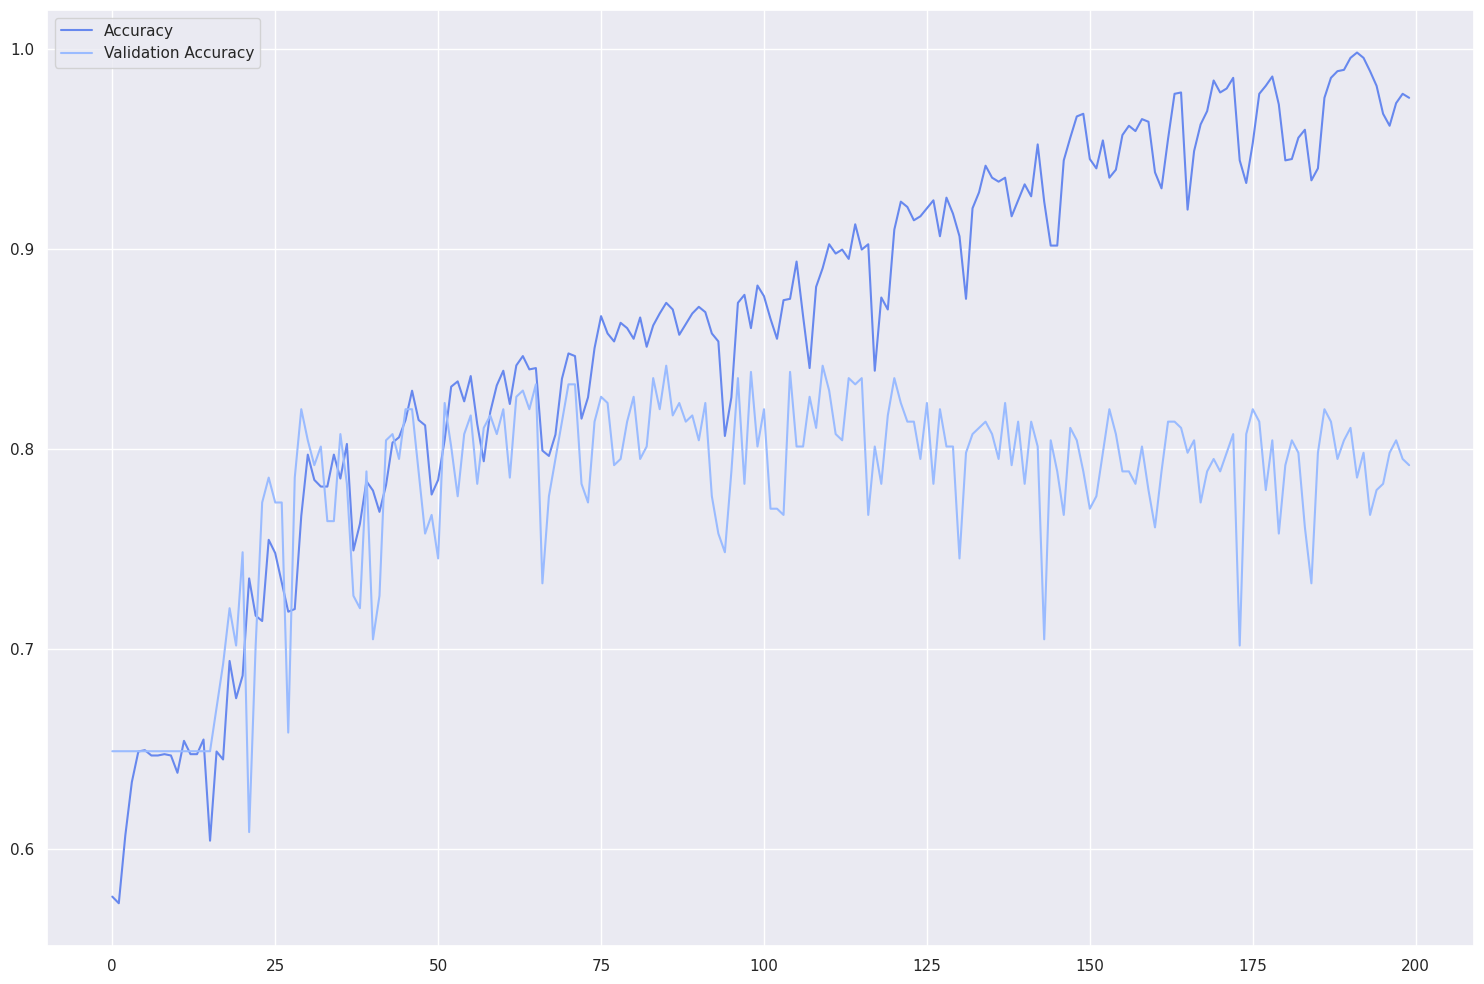

In [166]:
sns.lineplot(history.history['accuracy'], label='Accuracy')
sns.lineplot(history.history['val_accuracy'], label='Validation Accuracy')

plt.tight_layout()
plt.legend()
plt.show()


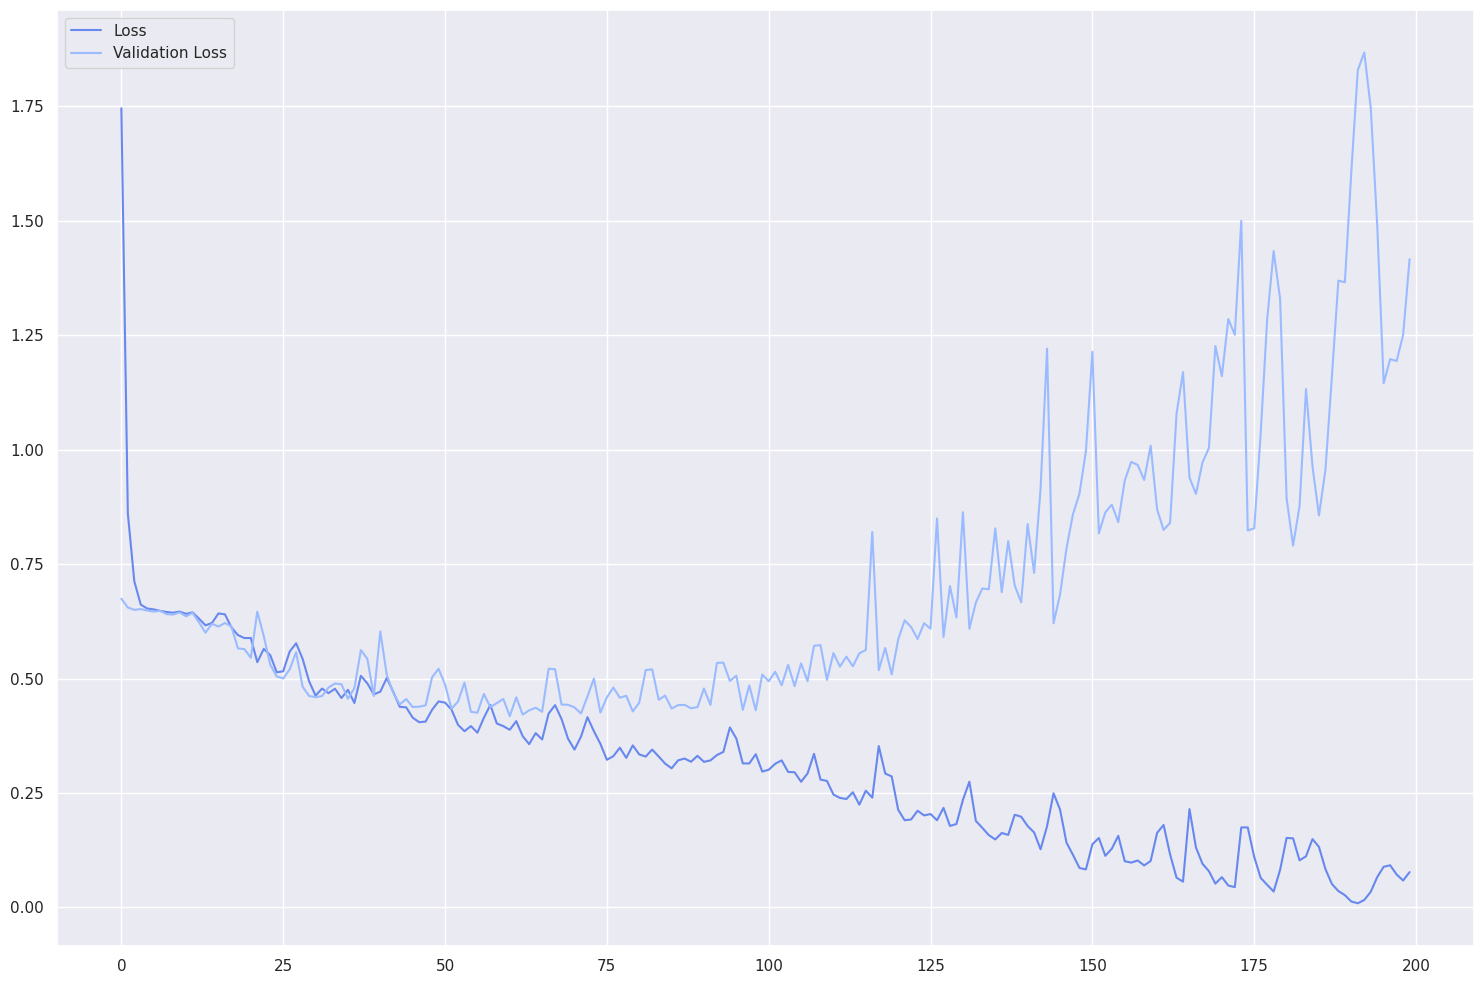

In [168]:
sns.lineplot(history.history['loss'], label='Loss')
sns.lineplot(history.history['val_loss'], label='Validation Loss')

plt.tight_layout()
plt.legend()
plt.show()
